Assignment-3 CNN Model

__Importing Libraries__

In [ ]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

**Loading and Preparing the data**

In [ ]:
#import dataset and split into train and test data
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#to see length of training dataset
len(x_train)

60000

In [ ]:
#to see length of testing dataset
len(x_test)

10000

In [ ]:
#shape of training dataset  60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [ ]:
#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

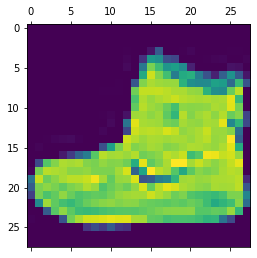

In [ ]:
#to see how first image look
plt.matshow(x_train[0])

In [ ]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Creating the model**

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

In [ ]:
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

In [ ]:
CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))



In [ ]:
CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                    

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history=model.fit(x_train, y_train,epochs=10) #,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7505 - accuracy: 0.7536
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5161 - accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4720 - accuracy: 0.8379
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4467 - accuracy: 0.8469
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4293 - accuracy: 0.8524
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4157 - accuracy: 0.8558
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4043 - accuracy: 0.8596
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3941 - accuracy: 0.8647
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3852 - accuracy: 0.8670
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [ ]:
# Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.4172 - accuracy: 0.8535
Loss=0.417
Accuracy=0.854


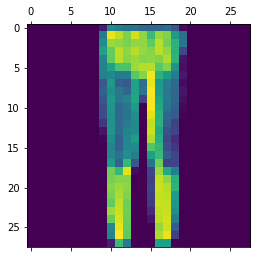

In [ ]:
# Making Prediction on Data
plt.matshow(x_test[3])

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
#we use predict() on new data
predicted_value=model.predict(x_test)
#print("Image is= %d" %np.argmax(predicted_value[0]))

313/313 [==============================] - 1s 3ms/step


In [ ]:
predicted_value.shape

(10000, 10)

In [ ]:
predicted_value[3]

array([5.32723789e-06, 9.99743104e-01, 1.01120404e-05, 2.21433234e-04,
       1.82518033e-05, 1.17792261e-07, 1.07726680e-06, 1.20642227e-07,
       3.56484634e-07, 1.12964486e-07], dtype=float32)

In [ ]:
np.argmax(predicted_value[3])

1

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels[np.argmax(predicted_value[3])]

'Trouser'

In [ ]:
history.history??

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

**Plot the graph for Loss Vs. Accuracy**

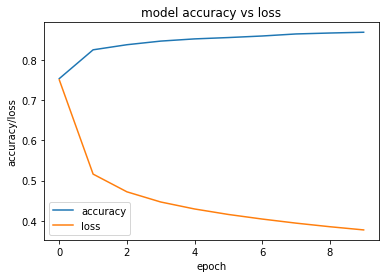

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='best')
plt.show()

**Conclusion**

With the above code, we can see that through the epochs, our model accuracy increases and the model loss decraeses.
This is good since our model gains confidence with its predictions.